# Question 2

In [1]:
!pip install nltk

In [2]:
!pip install tweepy

     -------------------------------------- 98.5/98.5 kB 188.2 kB/s eta 0:00:00
     ------------------------------------ 151.7/151.7 kB 104.1 kB/s eta 0:00:00


In [3]:
!pip install wordcloud

In [4]:
!pip install bs4

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1257 sha256=fedeb76e4c3028967ce3657e26f1190431590efa282954a96869e8e3e5cf4945
  Stored in directory: c:\users\dhananjay holgade\appdata\local\pip\cache\wheels\73\2b\cb\099980278a0c9a3e57ff1a89875ec07bfa0b6fcbebb9a8cad3
Successfully built bs4


In [5]:
!pip install selenium

     ---------------------------------------- 9.5/9.5 MB 148.3 kB/s eta 0:00:00
     ------------------------------------ 400.2/400.2 kB 224.9 kB/s eta 0:00:00
     -------------------------------------- 58.3/58.3 kB 153.4 kB/s eta 0:00:00


In [7]:
import numpy as np
import pandas as pd
import tweepy
import re
from matplotlib import pyplot as plt
import nltk
import textblob
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
wordnet = WordNetLemmatizer()
from sklearn.feature_extraction.text import TfidfVectorizer
import requests
import wordcloud
from wordcloud import WordCloud
from bs4 import BeautifulSoup as bs
from selenium import webdriver

In [8]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to C:\Users\DHANANJAY
[nltk_data]     HOLGADE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\DHANANJAY
[nltk_data]     HOLGADE\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\DHANANJAY
[nltk_data]     HOLGADE\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Connecting to Amazon and download reviews

In [9]:
boatrockerz_reviews=[]

In [11]:
for i in range (1,31):
    ip=[]
    url="https://www.amazon.in/Rockerz-450-Wireless-Bluetooth-Headphone/product-reviews/B07PR1CL3S/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=a"
    response = requests.get(url)
    soup = bs(response.content,"html.parser")
    reviews = soup.findAll("span",attrs = {"class","a-size-base review-text review-text-content"})
    for i in range(len(reviews)):
        ip.append(reviews[i].text)
    boatrockerz_reviews = boatrockerz_reviews+ip

# Downloading review from Amazon.in for the Earphones

In [12]:
boatrockerz_reviews = list(set(boatrockerz_reviews))

In [13]:
txt_upd = ' '.join(boatrockerz_reviews)

In [14]:
txt_upd = re.sub("[^A-Za-z" "]+"," ",txt_upd).lower() #remove special character
txt_upd = re.sub("[0-9" "]+"," ",txt_upd).lower() #remove special numbers
txt_upd = re.sub(r'^https?:\/\/.*[\r\n]*','',txt_upd).lower() #remove hyperlink

In [15]:
text_tokens = word_tokenize(txt_upd)

In [16]:
tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]

# Creating the Dataframe

In [17]:
tf = TfidfVectorizer()

In [18]:
text_tf = tf.fit_transform(tokens_without_sw)

In [19]:
feature_names = tf.get_feature_names()
dense = text_tf.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=feature_names)

D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [20]:
df

,ability,accessibility,accessories,additionally,adds,adjustable,admirably,advanced,aesthetic,affordable,...,wearing,wired,wireless,work,worked,working,worth,worthy,year,yuo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
525,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
526,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
word_list = ' '.join(df)

In [22]:
wordcloud = WordCloud(background_color='white',
                     width=1800,
                     height=1400).generate(word_list)

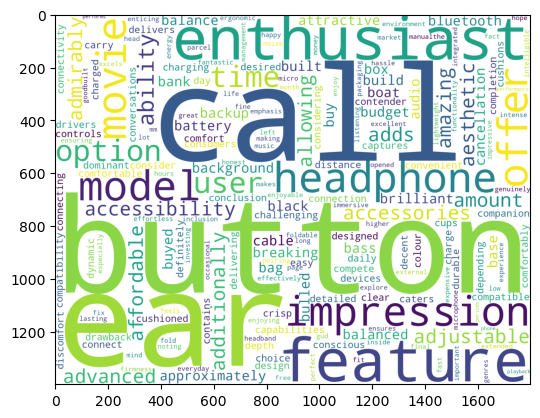

In [23]:
plt.imshow(wordcloud)

# Sentimental Analysis

In [29]:
with open("C:\\Users\DHANANJAY HOLGADE\Downloads\\positive-words.txt") as pw:
    positive_words = pw.read().split("\n")

In [30]:
positive_words = positive_words[35:]

In [31]:
with open("C:\\Users\DHANANJAY HOLGADE\Downloads\\negative-words.txt",encoding='latin-1') as nw:
    negative_words = nw.read().split("\n")

In [32]:
 negative_words =  negative_words[35:]

In [33]:
txt_neg_in_nw = ' '.join([word for word in df if word in negative_words])

In [34]:
wordcloud_neg = WordCloud(
                      background_color='white',
                      width=1800,
                      height=1400
                      ).generate(txt_neg_in_nw)

In [35]:
txt_pos_in_pw = ' '.join([word for word in df if word in positive_words])

In [36]:
wordcloud_pos = WordCloud(
                      background_color='white',
                      width=1800,
                      height=1400
                      ).generate(txt_pos_in_pw)

# Conclusion

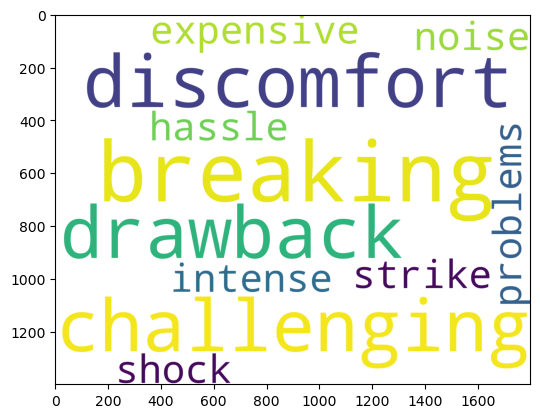

In [37]:
plt.imshow(wordcloud_neg)

Above given is the wordcloud for negative reviews

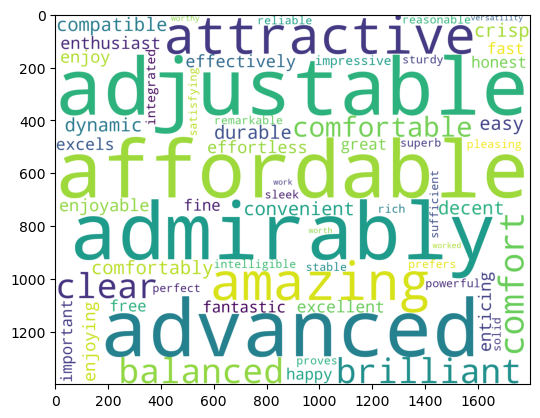

In [40]:
plt.imshow(wordcloud_pos)

Above given is the wordcloud for positive reviews